In [1]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 2.8MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [24]:
!pip install graphviz==0.10
!apt-get install graphviz # baixar por cli no linux

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
mapa = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_modelo",
    "price" : "preco",
    "sold" : "vendido",
}
dados = dados.rename(columns = mapa)
troca = {
    'no' : 0,
    'yes' : 1
}
dados['vendido'] = dados.vendido.map(troca)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_modelo'] = ano_atual - dados.ano_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [5]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [6]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_modelo"], axis=1)
dados.head()

,preco,vendido,idade_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [7]:
x = dados[['preco', 'idade_modelo', 'km_por_ano']]
y = dados['vendido']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED) # seta random do py usado no train e fit
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 57.88%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
import numpy as np
previsoes_de_base = np.ones(2500)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do baseline foi %.2f%%" % acuracia)

A acurácia do baseline foi 58.00%


In [16]:
from sklearn.dummy import DummyClassifier
# stratified = proporcional
dummy_str = DummyClassifier()
dummy_str.fit(treino_x, treino_y)
#previsoes = dummy_str.predict(teste_x)
#acuracia = accuracy_score(teste_y, previsoes) * 100
#print("A acurácia do dummy stratified foi %.2f%%" % acuracia)
# ja pega a acuracia
dummy_str.score(teste_x, teste_y) * 100

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


53.800000000000004

In [18]:
from sklearn.dummy import DummyClassifier
# most frequent
dummy_mostfreq = DummyClassifier(strategy='most_frequent')
dummy_mostfreq.fit(treino_x, treino_y)
previsoes = dummy_mostfreq.predict(teste_x)

acuracia = dummy_mostfreq.score(teste_x, teste_y) * 100

print("A acurácia do dummy most frequency foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC # outra lib suporte alem do linear
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# importancia de escalas x/y parecidas, resizing escalas
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# caixa preta = vc nao sabe quais regras/decisoes estao sendo tomadas
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# importancia de escalas x/y parecidas, resizing escalas
# arvores de decisão não precisam de escala
# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

#decision tree with max node = 2
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


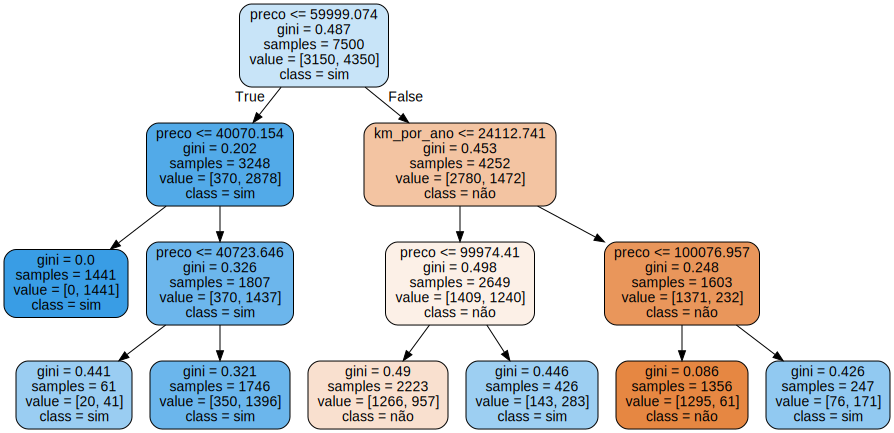

In [35]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded = True,
                            feature_names = features,
                           class_names=['não','sim']) # vai vender ou não?
grafico = graphviz.Source(dot_data)
grafico
# gini = decisão